In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
df=pd.read_excel(r'F:\Data analysis\Edulyt India\Project - 4 - Train Data.xlsx')

In [298]:
df.head()

Loanapp_ID Sex Marital_Status first_name    last_name  \
0  CPL001002   M              N     Austin    Pennycook   
1  CPL001003   M              Y     Mareah      Tomanek   
2  CPL001005   M              Y      Myrna  Rosenthaler   
3  CPL001006   M              Y   Danyette       Stempe   
4  CPL001008   M              N     Patten      McCathy   

                     email                     address Dependents  Qual_var  \
0      apennycook1@mac.com             007 Miller Road          0      Grad   
1  mtomanek2@bloomberg.com  145 Charing Cross Junction          1      Grad   
2   mrosenthaler3@dmoz.org             268 Algoma Hill          0      Grad   
3      dstempe4@tumblr.com       571 Stone Corner Park          0  Non Grad   
4        pmccathy5@ted.com           118 Moulton Drive          0      Grad   

  SE  App_Income_1  App_Income_2  CPL_Amount  CPL_Term  Credit_His Prop_Area  \
0  N        7018.8           0.0         NaN     360.0         1.0     Urban   
1  N        5499.6        1809.6       153.6     360.0         1.0     Rural   
2  Y        3600.0           0.0        79.2     360.0         1.0     Urban   
3  N        3099.6        2829.6       144.0     360.0         1.0     Urban   
4  N        7200.0           0.0       169.2     360.0         1.0     Urban   

       INT_ID      Prev_ID                                             AGT_ID  \
0  9694176212  92-247-0058  Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...   
1   152387684  36-236-3028  Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...   
2  6510396556  34-339-0917  Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...   
3  7141853006  94-098-8902  Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...   
4    23293411  38-247-1410  Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...   

  CPL_Status  
0          Y  
1          N  
2          Y  
3          Y  
4          Y

In [299]:
#df.info()

In [300]:
#df.describe

In [301]:
#df.isnull().sum()

In [302]:
# 614 rows x 20 columns

## Handling Missing Values

In [303]:
df['Sex'][df['Sex']=='M'].value_counts()

M    489
Name: Sex, dtype: int64

In [304]:
df['Sex'][df['Sex']=='F'].value_counts()

F    112
Name: Sex, dtype: int64

In [305]:
df['Sex'].fillna('O',inplace=True)

In [306]:
df['Sex'].unique()

array(['M', 'F', 'O'], dtype=object)

In [307]:
df['Marital_Status'].fillna('Y',inplace=True)

In [308]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [309]:
df['Dependents'].fillna(0,inplace=True)

In [310]:
#df.isnull().sum()

In [311]:
df.SE.value_counts()

N    500
Y     82
Name: SE, dtype: int64

In [312]:
df.SE.fillna('N',inplace=True)

In [313]:
df.CPL_Amount.fillna(df.CPL_Amount.median(),inplace=True)


In [314]:
#df.isnull().sum()

In [315]:
df.CPL_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: CPL_Term, dtype: int64

In [316]:
df.CPL_Term.fillna(360.0,inplace=True)

In [317]:
df.Credit_His.value_counts()

1.0    475
0.0     89
Name: Credit_His, dtype: int64

In [318]:
df.Credit_His.fillna(1.0,inplace=True)

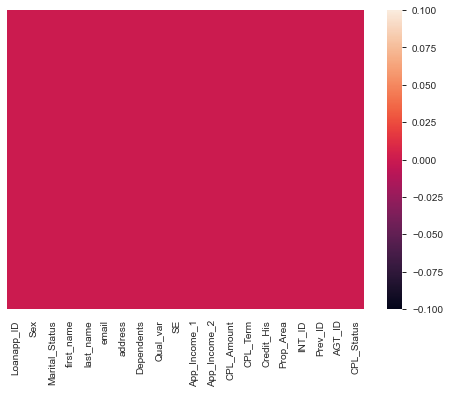

In [319]:
sns.heatmap(df.isnull(),yticklabels=False)

In [25]:
from pandas_profiling import ProfileReport

# Exploratory Data Analysis and Preprocessing

In [320]:
data=df.copy()

In [321]:
data.drop(columns=['Loanapp_ID','first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'],inplace=True)

In [322]:
data.isnull().sum()

Sex               0
Marital_Status    0
Dependents        0
Qual_var          0
SE                0
App_Income_1      0
App_Income_2      0
CPL_Amount        0
CPL_Term          0
Credit_His        0
Prop_Area         0
CPL_Status        0
dtype: int64

In [323]:
data.head()

Sex Marital_Status Dependents  Qual_var SE  App_Income_1  App_Income_2  \
0   M              N          0      Grad  N        7018.8           0.0   
1   M              Y          1      Grad  N        5499.6        1809.6   
2   M              Y          0      Grad  Y        3600.0           0.0   
3   M              Y          0  Non Grad  N        3099.6        2829.6   
4   M              N          0      Grad  N        7200.0           0.0   

   CPL_Amount  CPL_Term  Credit_His Prop_Area CPL_Status  
0       153.6     360.0         1.0     Urban          Y  
1       153.6     360.0         1.0     Rural          N  
2        79.2     360.0         1.0     Urban          Y  
3       144.0     360.0         1.0     Urban          Y  
4       169.2     360.0         1.0     Urban          Y

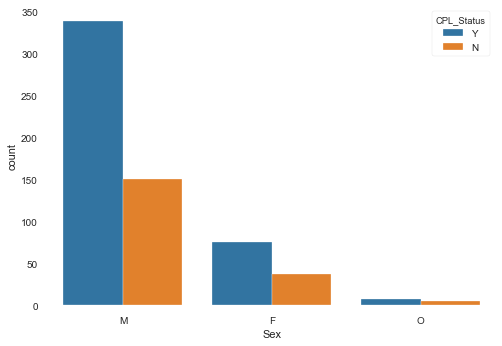

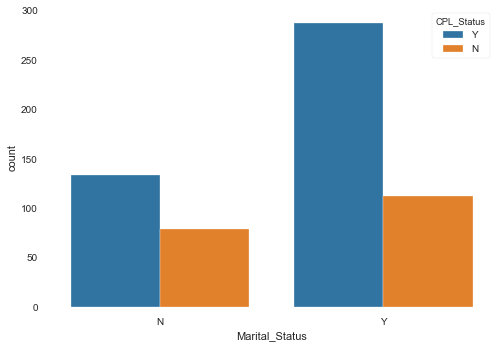

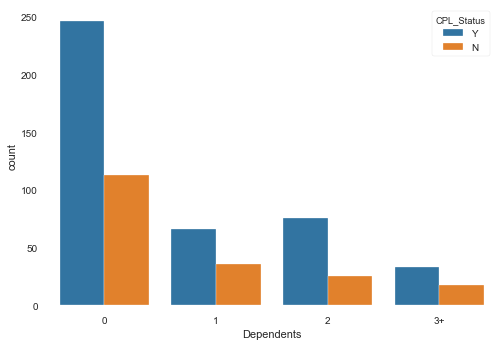

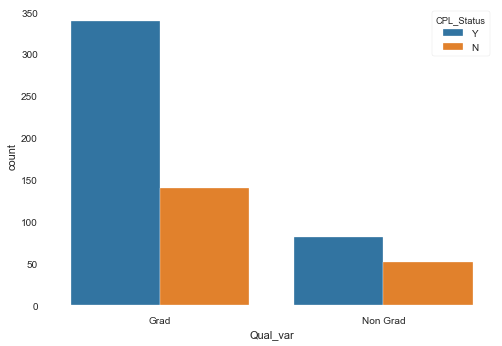

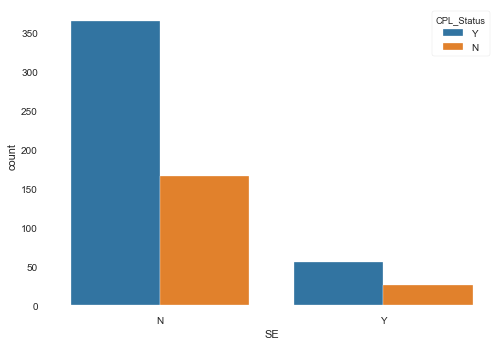

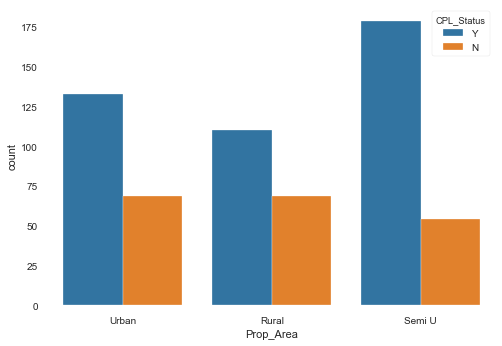

In [324]:
for x in ['Sex','Marital_Status','Dependents','Qual_var','SE','Prop_Area']:
    sns.countplot(x=x,hue='CPL_Status',data=data)
    plt.show()

#### Conclusions:- 1. People in male category are lot more than other categories
####                          2. People who are married are more and have better chances of approval than those who are not
####                          3.There are much more independent people than dependent people but it does not mean dependent people have   more chances of rejection
####                          4.Non graduated people have higher rejected appications than graduated ones.
####                          5. There are more self employed people who applied for loan than others.
####                          6. There are more applications from semi U areas and also with better approvals.

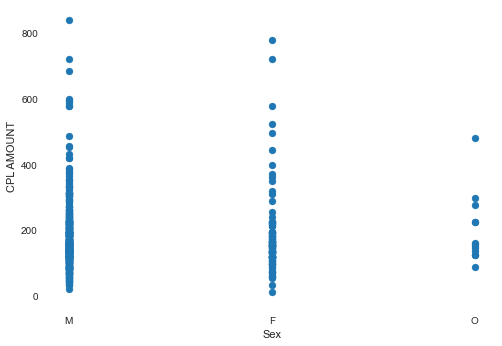

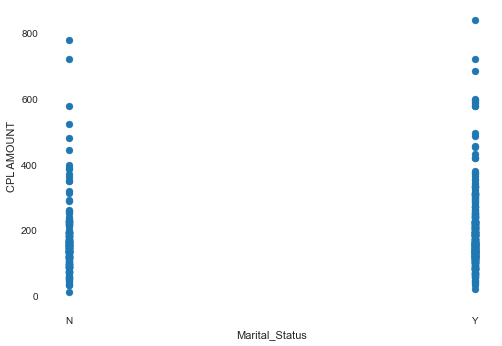

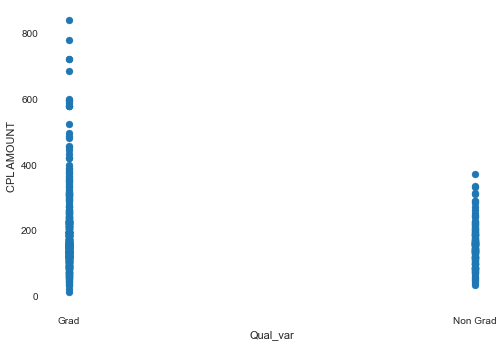

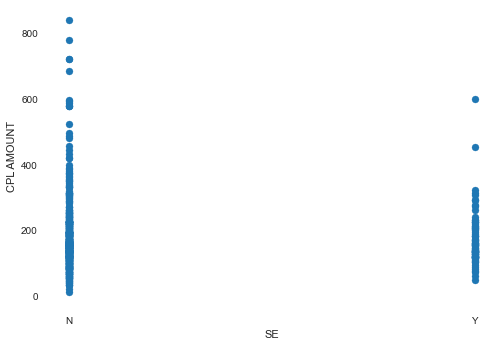

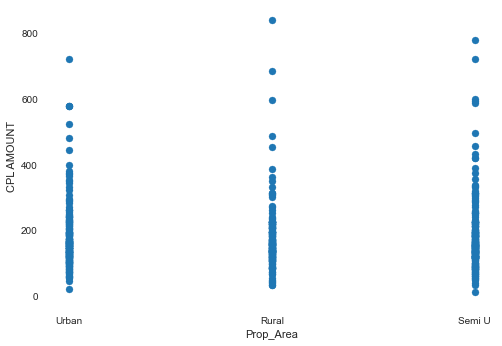

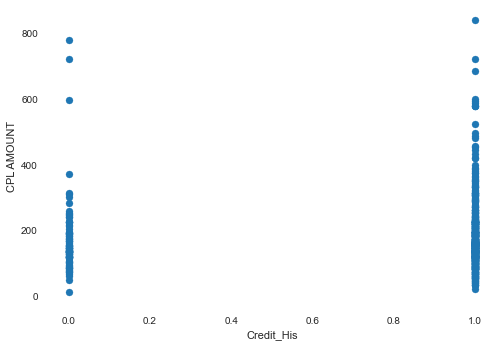

In [325]:
for x in ['Sex','Marital_Status','Qual_var','SE','Prop_Area','Credit_His']:
#    sns.boxplot(x=x,y='CPL_Amount',data=data,palette='winter')
    plt.scatter(data[x],data['CPL_Amount'])
    plt.xlabel(x)
    plt.ylabel('CPL AMOUNT')
    plt.show()

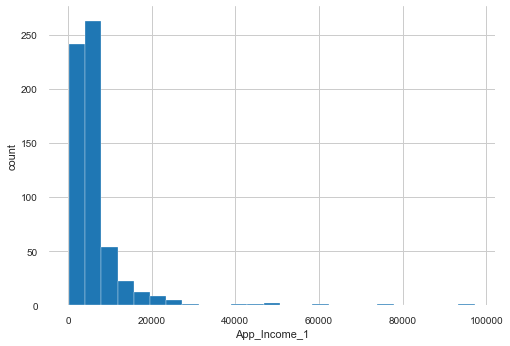

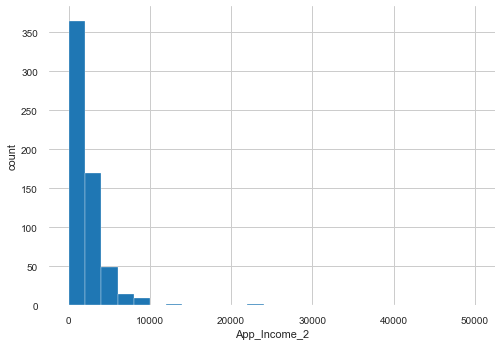

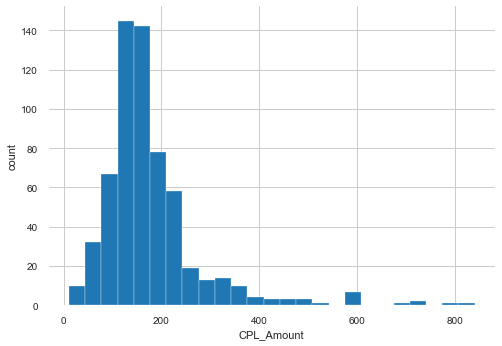

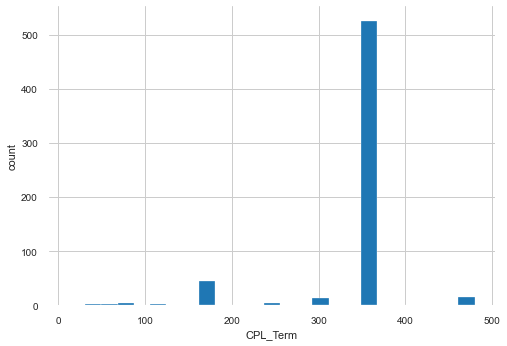

In [326]:
for x in ['App_Income_1','App_Income_2','CPL_Amount','CPL_Term']:
    data[x].hist(bins=25)
    plt.xlabel(x)
    plt.ylabel('count')
    plt.show()

In [46]:
profile=ProfileReport(data,title='Pandas Profiling Report',explorative=True)

In [47]:
profile.to_widgets()

In [327]:
data.head()

Sex Marital_Status Dependents  Qual_var SE  App_Income_1  App_Income_2  \
0   M              N          0      Grad  N        7018.8           0.0   
1   M              Y          1      Grad  N        5499.6        1809.6   
2   M              Y          0      Grad  Y        3600.0           0.0   
3   M              Y          0  Non Grad  N        3099.6        2829.6   
4   M              N          0      Grad  N        7200.0           0.0   

   CPL_Amount  CPL_Term  Credit_His Prop_Area CPL_Status  
0       153.6     360.0         1.0     Urban          Y  
1       153.6     360.0         1.0     Rural          N  
2        79.2     360.0         1.0     Urban          Y  
3       144.0     360.0         1.0     Urban          Y  
4       169.2     360.0         1.0     Urban          Y

In [328]:
# One hot encoding used for nominal variables
data1=pd.get_dummies(data,columns=['Sex','Marital_Status','SE'],drop_first=True)

In [329]:
data1.head()

Dependents  Qual_var  App_Income_1  App_Income_2  CPL_Amount  CPL_Term  \
0          0      Grad        7018.8           0.0       153.6     360.0   
1          1      Grad        5499.6        1809.6       153.6     360.0   
2          0      Grad        3600.0           0.0        79.2     360.0   
3          0  Non Grad        3099.6        2829.6       144.0     360.0   
4          0      Grad        7200.0           0.0       169.2     360.0   

   Credit_His Prop_Area CPL_Status  Sex_M  Sex_O  Marital_Status_Y  SE_Y  
0         1.0     Urban          Y      1      0                 0     0  
1         1.0     Rural          N      1      0                 1     0  
2         1.0     Urban          Y      1      0                 1     1  
3         1.0     Urban          Y      1      0                 1     0  
4         1.0     Urban          Y      1      0                 0     0

In [330]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()

In [331]:
#le.fit(['Grad','Non Grad'])

In [332]:
#data1.Qual_var=le.transform(data1.Qual_var)

In [333]:
data1.head()

Dependents  Qual_var  App_Income_1  App_Income_2  CPL_Amount  CPL_Term  \
0          0      Grad        7018.8           0.0       153.6     360.0   
1          1      Grad        5499.6        1809.6       153.6     360.0   
2          0      Grad        3600.0           0.0        79.2     360.0   
3          0  Non Grad        3099.6        2829.6       144.0     360.0   
4          0      Grad        7200.0           0.0       169.2     360.0   

   Credit_His Prop_Area CPL_Status  Sex_M  Sex_O  Marital_Status_Y  SE_Y  
0         1.0     Urban          Y      1      0                 0     0  
1         1.0     Rural          N      1      0                 1     0  
2         1.0     Urban          Y      1      0                 1     1  
3         1.0     Urban          Y      1      0                 1     0  
4         1.0     Urban          Y      1      0                 0     0

In [334]:
data1.Qual_var=data1.Qual_var.replace(['Grad','Non Grad'],[1,0])

In [335]:
data1.Prop_Area.value_counts()

Semi U    233
Urban     202
Rural     179
Name: Prop_Area, dtype: int64

In [336]:
data1.Prop_Area=data1.Prop_Area.replace(['Urban','Semi U','Rural'],[2,1,0])

In [337]:
data1.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [338]:
data1.Dependents=data1.Dependents.replace([0,1,2,'3+'],[3,2,1,0])

In [339]:
data1.Dependents.value_counts()

3    360
2    102
1    101
0     51
Name: Dependents, dtype: int64

In [340]:
data1.CPL_Status=data1.CPL_Status.replace(['Y','N'],[1,0])

In [341]:
data1.head()

Dependents  Qual_var  App_Income_1  App_Income_2  CPL_Amount  CPL_Term  \
0           3         1        7018.8           0.0       153.6     360.0   
1           2         1        5499.6        1809.6       153.6     360.0   
2           3         1        3600.0           0.0        79.2     360.0   
3           3         0        3099.6        2829.6       144.0     360.0   
4           3         1        7200.0           0.0       169.2     360.0   

   Credit_His  Prop_Area  CPL_Status  Sex_M  Sex_O  Marital_Status_Y  SE_Y  
0         1.0          2           1      1      0                 0     0  
1         1.0          0           0      1      0                 1     0  
2         1.0          2           1      1      0                 1     1  
3         1.0          2           1      1      0                 1     0  
4         1.0          2           1      1      0                 0     0

In [67]:
profile=ProfileReport(data1,title='Pandas Profiling Report',explorative=True)


In [68]:
profile.to_widgets()

### There is a good correlation between Credit His and CPL_Status

In [342]:
feature_scale=[feature for feature in data1.columns if feature not in ['SE_Y']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data1[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [343]:
data2=pd.DataFrame(scaler.transform(data1[feature_scale]),columns=feature_scale)

In [344]:
data2['SE_Y']=data1['SE_Y']

In [345]:
data2.head()

Dependents  Qual_var  App_Income_1  App_Income_2  CPL_Amount  CPL_Term  \
0    1.000000       1.0      0.070489      0.000000    0.172214   0.74359   
1    0.666667       1.0      0.054830      0.036192    0.172214   0.74359   
2    1.000000       1.0      0.035250      0.000000    0.082489   0.74359   
3    1.000000       0.0      0.030093      0.056592    0.160637   0.74359   
4    1.000000       1.0      0.072356      0.000000    0.191027   0.74359   

   Credit_His  Prop_Area  CPL_Status  Sex_M  Sex_O  Marital_Status_Y  SE_Y  
0         1.0        1.0         1.0    1.0    0.0               0.0     0  
1         1.0        0.0         0.0    1.0    0.0               1.0     0  
2         1.0        1.0         1.0    1.0    0.0               1.0     1  
3         1.0        1.0         1.0    1.0    0.0               1.0     0  
4         1.0        1.0         1.0    1.0    0.0               0.0     0

# Model Selection

In [346]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

In [347]:
X_train, X_test, y_train, y_test = train_test_split(data2.drop('CPL_Status',axis=1), 
                                                    data2['CPL_Status'], test_size=0.20, 
                                                    random_state=101)

### Logistic Regression

In [348]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [349]:
predictions = logmodel.predict(X_test)

In [350]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7967479674796748

In [351]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.47      0.63        45
         1.0       0.76      0.99      0.86        78

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



### Kneighbors

In [352]:
#
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [353]:
predictions=model.predict(X_test)

In [354]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7886178861788617

### Linear SVC

In [355]:
model=LinearSVC()
model.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [356]:
predictions=model.predict(X_test)

In [357]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7967479674796748

In [358]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.47      0.63        45
         1.0       0.76      0.99      0.86        78

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



### Naive Bayes

In [359]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [360]:
predictions=model.predict(X_test)

In [361]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7642276422764228

### Decision Tree

In [362]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [363]:
predictions=model.predict(X_test)

In [364]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.6747967479674797

In [365]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56        45
         1.0       0.74      0.74      0.74        78

    accuracy                           0.67       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.67      0.67      0.67       123



### Gradient Boosting

In [366]:
Gmodel=GradientBoostingClassifier(n_estimators=280)
Gmodel.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=280,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [367]:
predictions=Gmodel.predict(X_test)

In [368]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7560975609756098

In [369]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.53      0.62        45
         1.0       0.77      0.88      0.82        78

    accuracy                           0.76       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.75      0.76      0.75       123



### Random Forest

In [370]:
from sklearn.ensemble import RandomForestClassifier

In [371]:
model=RandomForestClassifier()

In [372]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [373]:
predictions=model.predict(X_test)

In [374]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7804878048780488

In [375]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.47      0.61        45
         1.0       0.76      0.96      0.85        78

    accuracy                           0.78       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.78      0.76       123



### Hyper parameter tuning

In [376]:
random_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [377]:
from sklearn.model_selection import RandomizedSearchCV

In [378]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [223]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [227]:

rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [379]:
model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [380]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [381]:
predictions=model.predict(X_test)

In [382]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7967479674796748

In [383]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.47      0.63        45
         1.0       0.76      0.99      0.86        78

    accuracy                           0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



In [233]:
predictions

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0.])

# test dataset

In [277]:
df1=pd.read_excel(r'F:\Data analysis\Edulyt India\Project - 4 - Test Data.xlsx')

In [278]:
df1.head()

Loanapp_ID Sex Marital_Status first_name last_name                  email  \
0  CPL001015   M              Y     Dollie     Scafe          dscafe0@is.gd   
1  CPL001022   M              Y        Kim      Arne  karne9@infoseek.co.jp   
2  CPL001031   M              Y    Niccolo    Ramble        nramblef@gov.uk   
3  CPL001035   M              Y      Rabbi      Haig         rhaigg@tiny.cc   
4  CPL001051   M              N     Gracie    Winear    gwinearj@devhub.com   

                   address Dependents  Qual_var SE  App_Income_1  \
0         02 Garrison Pass          0      Grad  N        6864.0   
1        6568 Dwight Point          1      Grad  N        3691.2   
2         3504 Lukken Park          2      Grad  N        6000.0   
3        1334 Florence Way          2      Grad  N        2808.0   
4  9800 Ridge Oak Crossing          0  Non Grad  N        3931.2   

   App_Income_2  CPL_Amount  CPL_Term  Credit_His      INT_ID      Prev_ID  \
0           0.0       132.0     360.0         1.0  6869736235  79-489-1539   
1        1800.0       151.2     360.0         1.0  3383749711  75-757-9174   
2        2160.0       249.6     360.0         1.0  7247894032  42-085-4345   
3        3055.2       120.0     360.0         NaN  3240492342  10-813-9695   
4           0.0        93.6     360.0         1.0  1670564037  20-195-4948   

                                              AGT_ID Prop_Area  
0  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...     Urban  
1  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2)...     Urban  
2  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...     Urban  
3  Mozilla/5.0 (X11; Linux i686) AppleWebKit/534....     Urban  
4  Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.2...     Urban

In [279]:
df1.isnull().sum()

Loanapp_ID         0
Sex               11
Marital_Status     0
first_name         0
last_name          0
email              0
address            0
Dependents        10
Qual_var           0
SE                23
App_Income_1       0
App_Income_2       0
CPL_Amount         0
CPL_Term           6
Credit_His        29
INT_ID             0
Prev_ID            0
AGT_ID             0
Prop_Area          0
dtype: int64

In [253]:
df.isnull().sum()

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64

In [280]:
df1['Sex'].fillna('O',inplace=True)

In [281]:
df1['Marital_Status'].fillna('Y',inplace=True)

In [282]:
df1['Dependents'].fillna(0,inplace=True)

In [283]:
df1.SE.fillna('N',inplace=True)

In [284]:
df1.CPL_Term.fillna(360.0,inplace=True)

In [285]:
df1.Credit_His.fillna(1.0,inplace=True)

In [286]:
df1.isnull().sum()

Loanapp_ID        0
Sex               0
Marital_Status    0
first_name        0
last_name         0
email             0
address           0
Dependents        0
Qual_var          0
SE                0
App_Income_1      0
App_Income_2      0
CPL_Amount        0
CPL_Term          0
Credit_His        0
INT_ID            0
Prev_ID           0
AGT_ID            0
Prop_Area         0
dtype: int64

In [287]:
df1.head()

Loanapp_ID Sex Marital_Status first_name last_name                  email  \
0  CPL001015   M              Y     Dollie     Scafe          dscafe0@is.gd   
1  CPL001022   M              Y        Kim      Arne  karne9@infoseek.co.jp   
2  CPL001031   M              Y    Niccolo    Ramble        nramblef@gov.uk   
3  CPL001035   M              Y      Rabbi      Haig         rhaigg@tiny.cc   
4  CPL001051   M              N     Gracie    Winear    gwinearj@devhub.com   

                   address Dependents  Qual_var SE  App_Income_1  \
0         02 Garrison Pass          0      Grad  N        6864.0   
1        6568 Dwight Point          1      Grad  N        3691.2   
2         3504 Lukken Park          2      Grad  N        6000.0   
3        1334 Florence Way          2      Grad  N        2808.0   
4  9800 Ridge Oak Crossing          0  Non Grad  N        3931.2   

   App_Income_2  CPL_Amount  CPL_Term  Credit_His      INT_ID      Prev_ID  \
0           0.0       132.0     360.0         1.0  6869736235  79-489-1539   
1        1800.0       151.2     360.0         1.0  3383749711  75-757-9174   
2        2160.0       249.6     360.0         1.0  7247894032  42-085-4345   
3        3055.2       120.0     360.0         1.0  3240492342  10-813-9695   
4           0.0        93.6     360.0         1.0  1670564037  20-195-4948   

                                              AGT_ID Prop_Area  
0  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...     Urban  
1  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_2)...     Urban  
2  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...     Urban  
3  Mozilla/5.0 (X11; Linux i686) AppleWebKit/534....     Urban  
4  Mozilla/5.0 (Windows NT 6.0) AppleWebKit/534.2...     Urban

In [288]:
df1.drop(columns=['Loanapp_ID','first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'],inplace=True)

In [289]:
df1=pd.get_dummies(df1,columns=['Sex','Marital_Status','SE'],drop_first=True)

In [290]:
df1.head()

Dependents  Qual_var  App_Income_1  App_Income_2  CPL_Amount  CPL_Term  \
0          0      Grad        6864.0           0.0       132.0     360.0   
1          1      Grad        3691.2        1800.0       151.2     360.0   
2          2      Grad        6000.0        2160.0       249.6     360.0   
3          2      Grad        2808.0        3055.2       120.0     360.0   
4          0  Non Grad        3931.2           0.0        93.6     360.0   

   Credit_His Prop_Area  Sex_M  Sex_O  Marital_Status_Y  SE_Y  
0         1.0     Urban      1      0                 1     0  
1         1.0     Urban      1      0                 1     0  
2         1.0     Urban      1      0                 1     0  
3         1.0     Urban      1      0                 1     0  
4         1.0     Urban      1      0                 0     0

In [291]:
df1.Qual_var=df1.Qual_var.replace(['Grad','Non Grad'],[1,0])
df1.Prop_Area=df1.Prop_Area.replace(['Urban','Semi U','Rural'],[2,1,0])
df1.Dependents=df1.Dependents.replace([0,1,2,'3+'],[3,2,1,0])

In [292]:
df1.head()

Dependents  Qual_var  App_Income_1  App_Income_2  CPL_Amount  CPL_Term  \
0           3         1        6864.0           0.0       132.0     360.0   
1           2         1        3691.2        1800.0       151.2     360.0   
2           1         1        6000.0        2160.0       249.6     360.0   
3           1         1        2808.0        3055.2       120.0     360.0   
4           3         0        3931.2           0.0        93.6     360.0   

   Credit_His  Prop_Area  Sex_M  Sex_O  Marital_Status_Y  SE_Y  
0         1.0          2      1      0                 1     0  
1         1.0          2      1      0                 1     0  
2         1.0          2      1      0                 1     0  
3         1.0          2      1      0                 1     0  
4         1.0          2      1      0                 0     0

In [294]:
feature_scale=[feature for feature in df1.columns]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df1[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [295]:
test=pd.DataFrame(scaler.transform(df1[feature_scale]),columns=feature_scale)

In [296]:
test.head()

Dependents  Qual_var  App_Income_1  App_Income_2  CPL_Amount  CPL_Term  \
0    1.000000       1.0      0.078865      0.000000    0.157088  0.746835   
1    0.666667       1.0      0.042411      0.062500    0.187739  0.746835   
2    0.333333       1.0      0.068938      0.075000    0.344828  0.746835   
3    0.333333       1.0      0.032263      0.106083    0.137931  0.746835   
4    1.000000       0.0      0.045168      0.000000    0.095785  0.746835   

   Credit_His  Prop_Area  Sex_M  Sex_O  Marital_Status_Y  SE_Y  
0         1.0        1.0    1.0    0.0               1.0   0.0  
1         1.0        1.0    1.0    0.0               1.0   0.0  
2         1.0        1.0    1.0    0.0               1.0   0.0  
3         1.0        1.0    1.0    0.0               1.0   0.0  
4         1.0        1.0    1.0    0.0               0.0   0.0

In [388]:
model=LinearSVC()
model.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [389]:
y_pred=model.predict(test)

In [391]:
y_pred=pd.DataFrame(y_pred)

In [392]:
y_pred.to_excel(r'F:\Data analysis\Edulyt India\submission.xlsx')

In [395]:
pred=pd.read_excel(r'F:\Data analysis\Edulyt India\submission.xlsx')

In [396]:
pred.to_csv(r'F:\Data analysis\Edulyt India\submission.csv')